['setosa' 'versicolor' 'virginica']
(150, 2)


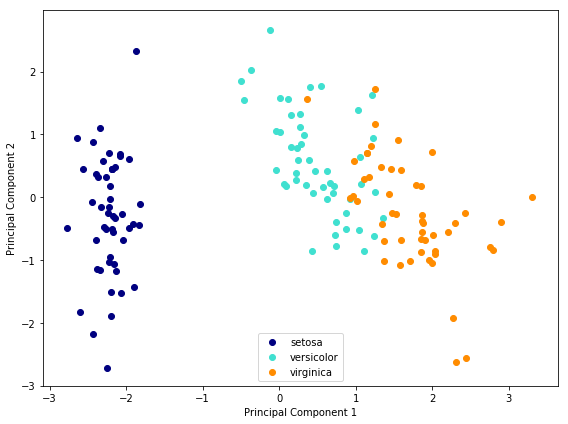

In [6]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

target_names = iris.target_names
print(target_names)

X_std = StandardScaler().fit_transform(X)

mean_vec = np.mean(X, axis=0)

mean_vec = np.mean(X_std, axis=0)
#cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
  
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))


X_rr = X_std.dot(matrix_w)
print(X_rr.shape)
colors = ['navy', 'turquoise', 'darkorange']
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_rr[y == i, 0], X_rr[y == i, 1], color=color, 
                label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.savefig('PREDI3.png', format='png', dpi=1200)
plt.show()



No handles with labels found to put in legend.


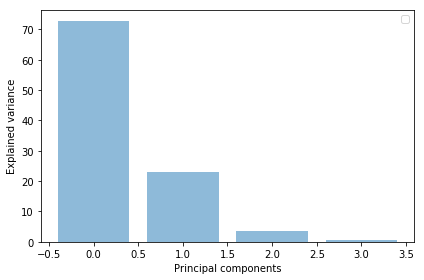

In [5]:
plt.figure(figsize=(6, 4))
plt.bar(range(4), var_exp, alpha=0.5, align='center')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()